<a href="https://colab.research.google.com/github/jialun-yu/Projects/blob/main/YU_JIALUN_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part A**

**1- Write a function lower_tweet(tw) that takes in as input tw, a tweet string. Then, return the same string all in lower case (%2).**

In [ ]:
def lower_tweet(tw):
  return tw.lower()

**2- Write a function clean_data(tw) that takes in as input tw, a tweet string, cleans it by removing all punctuations and returns the cleaned tweet as output . (The function must have a return statement) (%5).**

In [ ]:
def clean_data(tw):
  clean_tw = ''
  for i in tw:
    if i in 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789 ':
      clean_tw += i
  return clean_tw

**3- Write a function remove_stop_words(tw) that takes as input tw, a tweet string line, and returns the cleaned (stop words removed) version of the tweet as a string. Use the stop_words.txt file for this section. Note that before attempting to remove the stop words, all punctuations should be removed from the lower case tweet. (The function must have a return statement.) (%10)**


In [ ]:
f = open('stop_words.txt','r')
stop_words = []
current_line = f.readline()
while current_line != '':
  current_line = current_line.rstrip('\n')
  stop_words.append(current_line)
  current_line = f.readline()
f.close()

In [ ]:
def remove_stop_words(tw):
  removed = ''
  help_list = tw.split()
  for i in help_list:
    if i not in stop_words:
      removed += i
      removed += ' '
  return removed[:-1]

**4- Write a function, bag_of_words(tw), that takes as input a tweet and creates a bag-of-words for it. A bag-of-words is a proper data structure that lists the number of times a word occurs in each tweet (10%). When called on a string: drink forgotten table drink, bag_of_words should return a proper Python data structure: 'drink': 2, 'forgotten': 1, 'table': 1**

In [ ]:
def bag_of_words(tw):
  bag = {}
  help_list = tw.split()
  for i in help_list:
    if i in bag:
      bag[i] += 1
    else:
      bag[i] = 1
  return bag

# **Part B**

**1- Write a function candidate_relation(tw), that takes as an input a tweet and decides if the tweet is about which candidate (you can search for candidate’s names) (10%).**

In [ ]:
def candidate_relation(tw):
  result = ''
  DT = False
  JB = False
  if ('trump' in tw) or ('donald' in tw):
    DT = True
    result += 'T'
  elif ('joe' in tw) or ('biden' in tw):
    JB = True
    result += 'B'
  if DT or JB:
    return result
  else:
    return 'None'

**2- Write a function tweet_score(tw) to calculate a sentiment score for a tweet using the words it contains and their associated sentiment values. You can use the data in corpus.csv file to get the sentiment values associated with some of them. Notice that not all words in a tweet will have associated pre-calculated sentiment values. It is up to you, how you calculate the overall score for a tweet. The score should be a number between 0 (fully negative) and 1 (fully positive), e.g., score of 0.8 would indicate a tweet that is more positive than negative. A tweet that your algorithm cannot classify at all using the data in the corpus should be given a score of -1. (%20)**

In [ ]:
import pandas as pd

In [ ]:
f_corpus = open('corpus.txt','r')
corpus = {}
group = f_corpus.readline().strip('\t').strip('\n')
while group != '':
  help_list = group.split('\t')
  if '-' in group:
    corpus[help_list[0]] = 0 - int(group[-1])
  else:
    corpus[help_list[0]] = int(group[-1])
  group = f_corpus.readline().strip('\t').strip('\n')
f_corpus.close()

In [ ]:
def tweet_score(tw):
  score = 0
  exist = False
  help_list = tw.split()
  for i in help_list:
    if i in corpus:
      exist = True
      score += corpus[i]
  if not exist:
    return -1
  if exist:
    overall_score = (score+10)/20
    if overall_score > 1:
      return 1
    if overall_score < 0:
      return 0
    else:
      return overall_score

# **Part C**

**1- How positive or negative is the twitter environment toward each candidate? (18%)**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('us_election_tweets.csv')
df['tweet'] = df['tweet'].astype(str)
df['tweet'] = df['tweet'].apply(lower_tweet)
df['tweet'] = df['tweet'].apply(clean_data)
df['tweet'] = df['tweet'].apply(remove_stop_words)
df['candidate_relation'] = df['tweet'].apply(candidate_relation)
df['tweet_score'] = df['tweet'].apply(tweet_score)
df.candidate_relation = df.candidate_relation.astype(str)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_trump = df[(df['candidate_relation'] == 'T') & (df['tweet_score'] != -1)]
df_biden = df[(df['candidate_relation'] == 'B') & (df['tweet_score'] != -1)]
score_trump = sum(df_trump['tweet_score'])/len(df_trump)
score_biden = sum(df_biden['tweet_score'])/len(df_biden)
print('The tweet score for Trump is ' + str(score_trump) + '.')
print('The tweet score for Biden is ' + str(score_biden) + '.')

The tweet score for Trump is 0.5127596251266338.
The tweet score for Biden is 0.5431324390704642.


**Answer:**
> The tweet score for Trump is 0.5127596251266338.

> The tweet score for Biden is 0.5431324390704642.

*   Note: the range of tweet score is [0,1]






**2- How many supporters can you estimate for each one among these twitter users? (15%)**

In [ ]:
sup_trump = df[(df['candidate_relation'] == 'T') & (df['tweet_score'] > 0.5)]
sup_biden = df[(df['candidate_relation'] == 'B') & (df['tweet_score'] > 0.5)]
print('The supporters for Trump among these twitter users are around ' + str(len(sup_trump)) + ' persons.')
print('The supporters for Biden among these twitter users are around ' + str(len(sup_biden)) + ' persons.')

The supporters for Trump among these twitter users are around 11883 persons.
The supporters for Biden among these twitter users are around 2957 persons.


**Answer:**
> The supporters for Trump among these twitter users are around 11883 persons.

> The supporters for Biden among these twitter users are around 2957 persons.

**3- Analyze popularity of each candidate throughout the two months period. (10%)**



In [ ]:
def clear(str):
  if str[1] == '/':
    str = '0' + str
  if str[4] == '/':
    str = str[:3] + '0' + str[3:]
  return str

In [ ]:
df2 = pd.read_csv('us_election_tweets.csv')
df2 = df2[df2['date']!='[]']
df2['date'] = df2['date'].apply(clear)
df2['candidate_relation'] = df2['tweet'].apply(candidate_relation)
df2['tweet_score'] = df2['tweet'].apply(tweet_score)
df2_trump = df2[(df2['candidate_relation'] == 'T') & (df2['tweet_score'] != -1)]
df2_biden = df2[(df2['candidate_relation'] == 'B') & (df2['tweet_score'] != -1)]

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
trump_popularity = df2_trump.groupby(by=['date'])['tweet_score'].describe().transpose()
display(trump_popularity)

date,08/24/2020,08/25/2020,08/26/2020,08/27/2020,08/28/2020,08/29/2020,08/30/2020,08/31/2020,09/01/2020,09/02/2020,09/03/2020,09/04/2020,09/05/2020,09/06/2020,09/07/2020,09/08/2020,09/09/2020,09/10/2020,09/11/2020,09/12/2020,09/13/2020,09/14/2020,09/15/2020,09/16/2020,09/17/2020,09/18/2020,09/19/2020,09/20/2020,09/21/2020,09/22/2020,09/23/2020,09/24/2020,09/25/2020,09/26/2020,09/27/2020,09/28/2020,09/29/2020,09/30/2020,10/01/2020,10/02/2020,10/03/2020,10/04/2020,10/05/2020,10/06/2020,10/07/2020,10/08/2020,10/09/2020,10/10/2020,10/11/2020,10/12/2020,10/13/2020,10/14/2020,10/15/2020,10/16/2020,10/17/2020,10/18/2020,10/19/2020,10/20/2020,10/21/2020,10/22/2020,10/23/2020,10/24/2020,10/25/2020,10/26/2020,10/27/2020,10/28/2020
count,2.000000,12.000000,7.000000,10.00000,17.000000,9.000000,11.000000,11.000000,13.000000,3.000000,17.000000,21.000000,5.000000,31.000000,13.000000,11.000000,15.000000,4.000000,12.000000,7.000000,11.000000,12.000000,13.000000,8.000000,16.000000,13.000000,10.000000,19.000000,9.000000,9.000000,17.000000,27.000000,17.000000,11.000000,10.00000,18.000000,19.000000,46.000000,26.000000,27.000000,27.000000,18.0000,25.000000,15.000000,20.00000,23.000000,14.000000,15.000000,16.000000,23.000000,19.000000,25.000000,30.000000,23.000000,28.000000,16.000000,19.000000,26.000000,26.000000,35.000000,44.000000,29.000000,37.000000,33.000000,32.000000,33.000000
mean,0.600000,0.545833,0.557143,0.50500,0.523529,0.483333,0.481818,0.563636,0.419231,0.466667,0.455882,0.464286,0.510000,0.475806,0.484615,0.454545,0.460000,0.500000,0.441667,0.478571,0.618182,0.450000,0.557692,0.531250,0.440625,0.557692,0.565000,0.602632,0.516667,0.516667,0.494118,0.516667,0.602941,0.572727,0.56000,0.533333,0.468421,0.488043,0.459615,0.587037,0.501852,0.5000,0.580000,0.473333,0.51750,0.582609,0.539286,0.546667,0.450000,0.615217,0.526316,0.530000,0.533333,0.565217,0.485714,0.537500,0.536842,0.550000,0.509615,0.481429,0.523864,0.505172,0.554054,0.536364,0.612500,0.551515
std,0.070711,0.250870,0.136713,0.24204,0.123892,0.114564,0.187447,0.214582,0.222241,0.202073,0.148831,0.188509,0.198116,0.130940,0.206544,0.192944,0.160579,0.108012,0.137895,0.193342,0.257170,0.124316,0.176595,0.143769,0.155154,0.145554,0.270853,0.170354,0.254951,0.223607,0.176673,0.178131,0.090951,0.194118,0.13499,0.210042,0.170139,0.174224,0.208815,0.178989,0.160217,0.1774,0.198956,0.160208,0.17189,0.138670,0.192332,0.182705,0.167332,0.203064,0.165301,0.216506,0.169855,0.172175,0.155073,0.189297,0.183214,0.158114,0.189219,0.157221,0.186613,0.186770,0.191260,0.173328,0.176434,0.194247
min,0.550000,0.150000,0.350000,0.10000,0.300000,0.350000,0.200000,0.200000,0.000000,0.350000,0.300000,0.150000,0.350000,0.150000,0.050000,0.100000,0.000000,0.400000,0.150000,0.150000,0.150000,0.200000,0.300000,0.300000,0.150000,0.300000,0.000000,0.250000,0.100000,0.150000,0.250000,0.200000,0.400000,0.350000,0.35000,0.000000,0.200000,0.000000,0.000000,0.350000,0.150000,0.1000,0.300000,0.200000,0.10000,0.400000,0.250000,0.250000,0.200000,0.300000,0.300000,0.050000,0.200000,0.250000,0.200000,0.150000,0.200000,0.300000,0.150000,0.200000,0.000000,0.200000,0.050000,0.150000,0.200000,0.250000
25%,0.575000,0.400000,0.475000,0.33750,0.400000,0.400000,0.400000,0.375000,0.350000,0.350000,0.350000,0.350000,0.350000,0.400000,0.400000,0.375000,0.400000,0.437500,0.387500,0.400000,0.450000,0.400000,0.400000,0.462500,0.350000,0.450000,0.450000,0.475000,0.400000,0.400000,0.350000,0.400000,0.550000,0.425000,0.43750,0.450000,0.375000,0.400000,0.300000,0.475000,0.400000,0.3625,0.400000,0.350000,0.43750,0.500000,0.412500,0.400000,0.350000,0.450000,0.375000,0.400000,0.412500,0.450000,0.400000,0.400000,0.475000,0.450000,0.350000,0.375000,0.400000,0.350000,0.400000,0.400000,0.537500,0.400000
50%,0.600000,0.550000,0.600000,0.55000,0.550000,0.450000,0.450000,0.600000,0.450000,0.350000,0.450000,0.400000,0.400000,0.500000,0.550000,0.450000,0.400000,0.475000,0.450000,0.450000,0.600000,0.400000,0.550000,0.550000,0.425000,0.600000,0.550000

In [ ]:
biden_popularity = df2_biden.groupby(by=['date'])['tweet_score'].describe().transpose()
display(biden_popularity)

date,08/25/2020,08/27/2020,08/29/2020,08/30/2020,08/31/2020,09/02/2020,09/03/2020,09/05/2020,09/06/2020,09/07/2020,09/08/2020,09/10/2020,09/12/2020,09/14/2020,09/15/2020,09/16/2020,09/17/2020,09/18/2020,09/19/2020,09/20/2020,09/21/2020,09/22/2020,09/23/2020,09/24/2020,09/25/2020,09/26/2020,09/28/2020,09/30/2020,10/01/2020,10/02/2020,10/03/2020,10/05/2020,10/06/2020,10/07/2020,10/08/2020,10/09/2020,10/10/2020,10/11/2020,10/12/2020,10/13/2020,10/14/2020,10/15/2020,10/16/2020,10/17/2020,10/18/2020,10/19/2020,10/20/2020,10/21/2020,10/22/2020,10/23/2020,10/24/2020,10/25/2020,10/26/2020,10/27/2020,10/28/2020
count,1.0,2.000000,1.0,2.000000,2.000000,4.000000,3.000000,3.000000,4.000000,2.000000,3.000000,1.00,1.0,5.000000,4.000000,4.00,3.000000,2.000000,5.000000,2.00,1.00,2.000000,2.00,55.000000,2.000000,1.00,5.000000,6.000000,2.000000,4.0000,2.000000,9.000000,4.000000,3.000000,15.000000,1.00,16.000000,7.00000,8.000000,6.000000,6.000000,13.000000,8.000000,7.000000,7.000000,4.000000,2.000000,6.000000,13.000000,31.000000,5.000000,13.000000,10.000000,12.000000,11.000000
mean,0.5,0.750000,1.0,0.625000,0.675000,0.575000,0.383333,0.650000,0.437500,0.350000,0.466667,0.55,0.5,0.560000,0.600000,0.55,0.583333,0.575000,0.530000,0.45,0.85,0.375000,0.55,0.408182,0.375000,0.85,0.690000,0.641667,0.350000,0.5625,0.600000,0.627778,0.637500,0.883333,0.513333,0.55,0.518750,0.60000,0.500000,0.516667,0.658333,0.411538,0.562500,0.464286,0.571429,0.387500,0.625000,0.391667,0.411538,0.511290,0.480000,0.461538,0.535000,0.633333,0.577273
std,NaN,0.212132,NaN,0.318198,0.035355,0.155456,0.332916,0.278388,0.179699,0.353553,0.175594,NaN,NaN,0.151658,0.147196,0.10,0.076376,0.106066,0.148324,0.00,NaN,0.035355,0.00,0.045910,0.106066,NaN,0.054772,0.142887,0.070711,0.2250,0.212132,0.134887,0.170171,0.160728,0.139472,NaN,0.140089,0.11547,0.183225,0.103280,0.203511,0.140169,0.210017,0.137581,0.172861,0.188746,0.035355,0.261566,0.195953,0.150394,0.115109,0.227444,0.278936,0.102986,0.228433
min,0.5,0.600000,1.0,0.400000,0.650000,0.450000,0.000000,0.400000,0.300000,0.100000,0.300000,0.55,0.5,0.300000,0.450000,0.40,0.500000,0.500000,0.400000,0.45,0.85,0.350000,0.55,0.350000,0.300000,0.85,0.600000,0.400000,0.300000,0.2500,0.450000,0.350000,0.400000,0.700000,0.300000,0.55,0.350000,0.40000,0.250000,0.400000,0.400000,0.050000,0.350000,0.350000,0.250000,0.200000,0.600000,0.050000,0.050000,0.300000,0.350000,0.000000,0.000000,0.450000,0.000000
25%,0.5,0.675000,1.0,0.512500,0.662500,0.487500,0.275000,0.500000,0.337500,0.225000,0.375000,0.55,0.5,0.600000,0.525000,0.55,0.550000,0.537500,0.400000,0.45,0.85,0.362500,0.55,0.400000,0.337500,0.85,0.700000,0.600000,0.325000,0.4750,0.525000,0.600000,0.587500,0.825000,0.450000,0.55,0.450000,0.55000,0.425000,0.462500,0.562500,0.350000,0.400000,0.350000,0.500000,0.312500,0.612500,0.312500,0.250000,0.450000,0.400000,0.350000,0.475000,0.587500,0.575000
50%,0.5,0.750000,1.0,0.625000,0.675000,0.525000,0.550000,0.600000,0.375000,0.350000,0.450000,0.55,0.5,0.600000,0.575000,0.60,0.600000,0.575000,0.500000,0.45,0.85,0.375000,0.55,0.400000,0.375000,0.85,0.700000,0.650000,0.350000,0.6250,0.600000,0.650000,0.675000,0.950000,0.450000,0.55,0.450000,0.60000,0.450000,0.500000,0.625000,0.450000,0.475000,0.450000,0.650000,0.350000,0.625000,0.350000,0.450000,0.450000,0.450000,0.450000,0.550000,0.600000,0.600000
75%,0.5,0.825000,1.0,0.737500,0.687500,0.612500,0.575000,0.775000,0.475000,0.475000,0.550000,0.55,0.5,0.600000,0.650000,0.60,0.625000,0.612500,0.600000,0.45,0.85,0.387500,0.55,0.400000,0.412500,0.85,0.700000,0.737500,0.375000,0.7125,0.675000,0.700000,0.725000,0.975000,0.650000,0.55,0.562500,0.70000,0.600000,0.537500,0.725000,0.500000,0.737500,0.525000,0.675000,0.425000,0.637500,0.425000,0.550000,0.525000,0.600000,0.550000,0.675000,0.700000,0.600000
max,0.5,0.900000,1.0,0.850000,0.700000,0.800000,0.600000,0.950000,0.700000,0.600000,0.650000,0.55,0.5,0.700000,0.800000,0.60,0.650000,0.650000,0.750000,0.45,0.85,0.400000,0.55,0.700000,0.450000,0.85,0.750000,0.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

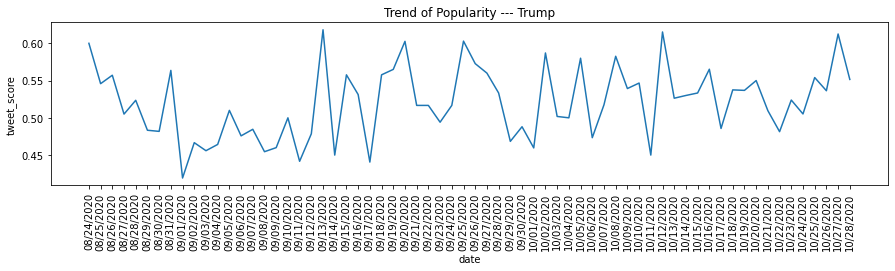

In [ ]:
x1 = df2_trump['date'].sort_values(ascending = True).unique()
y1 = df2_trump.groupby(by=['date'])['tweet_score'].mean()
plt.figure(figsize=(15,3))
plt.plot(x1,y1)
plt.xlabel('date')
plt.xticks(rotation=90)
plt.ylabel('tweet_score')
plt.title('Trend of Popularity --- Trump')
plt.show()

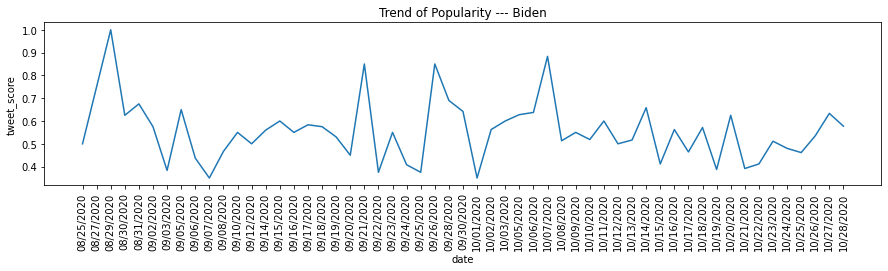

In [ ]:
x2 = df2_biden['date'].sort_values(ascending = True).unique()
y2 = df2_biden.groupby(by=['date'])['tweet_score'].mean()
plt.figure(figsize=(15,3))
plt.plot(x2,y2)
plt.xlabel('date')
plt.xticks(rotation=90)
plt.ylabel('tweet_score')
plt.title('Trend of Popularity --- Biden')
plt.show()

# **Part D**

**(Optional) Visualize a proper word cloud for tweets related to each candidate. It is allowed to use any packages you want for this part only. (+10%)**

In [ ]:
t_tw = df[(df['candidate_relation'] == 'T')]
b_tw = df[(df['candidate_relation'] == 'B')]

In [ ]:
def simplify(tw):
  simple = ''
  help_list = tw.split()
  for i in help_list:
    if i in corpus:
      simple += i + ' '
  if simple == '':
    return ' '
  else:
    return simple

In [ ]:
def split(str):
  return str.split()

In [ ]:
t_tw['simple_tw'] = t_tw['tweet'].apply(simplify)
t_tw['valid'] = t_tw['simple_tw'][t_tw['simple_tw']!='']
t_tw['split'] = t_tw['valid'].apply(split)
b_tw['simple_tw'] = b_tw['tweet'].apply(simplify)
b_tw['valid'] = b_tw['simple_tw'][b_tw['simple_tw']!='']
b_tw['split'] = b_tw['valid'].apply(split)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
t_total = t_tw['split'].sum()
t_str = ''
for i in t_total:
  t_str += i + ' '

In [ ]:
b_total = b_tw['split'].sum()
b_str = ''
for i in b_total:
  b_str += i + ' '

In [ ]:
t_bag = bag_of_words(t_str)
t_bag = pd.Series(t_bag).sort_values(ascending=False)
t_text = str(t_bag.keys())[6:]
t_text = clean_data(t_text)

b_bag = bag_of_words(b_str)
b_bag = pd.Series(b_bag).sort_values(ascending=False)
b_text = str(b_bag.keys())[6:]
b_text = clean_data(b_text)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud) 
    plt.axis('off');

**Wordcould for Trump**

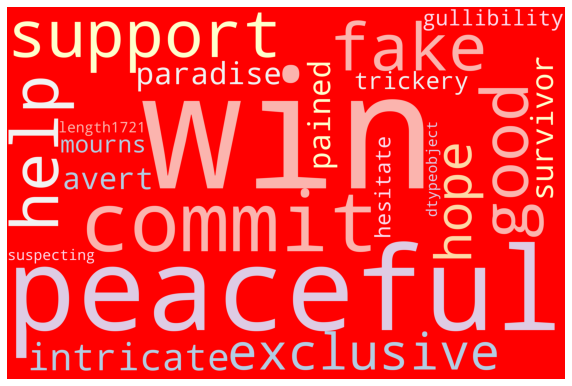

In [ ]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='red', colormap='Pastel1', collocations=False,).generate(t_text)
plot_cloud(wordcloud)

**Wordcould for Biden**

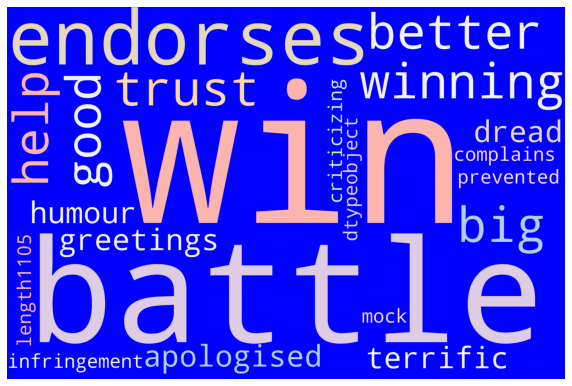

In [ ]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='Blue', colormap='Pastel1', collocations=False,).generate(b_text)
plot_cloud(wordcloud)